<a href="https://colab.research.google.com/github/shashi3876/CalculateCorrelation/blob/main/Dendogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction



#Data Collection

We will use real stock prices for several companies to analyze the correlation among them. Here, we will use the free API provided by Alpha Vantage to gather data. It provides both free APIs and premium APIs. You can obtain your own API Key from Alpha Vantage by providing your name and email. We will limit ourselves to the TIME SERIES DAILY ADJUSTED API which provide daily updates on the stock prices for the requested symbol. Here we use outputsize=full to obtain stock prices for the last 20 years. But we will limit our analysis to the prices during the last year. Outputsize=compact (the default value) will provide the stock prices for only the last 100 days and you can choose this option if you want a lesser number of data points. 



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

companies={'Apple':'AAPL','Amazon':'AMZN','Facebook':'META','Tesla':'TSLA','Alphabet (Google)':'GOOGL','Shell':'SHEL','Suncor Energy':'SU',
           'Exxon Mobil Corp':'XOM','Lululemon':'LULU','Walmart':'WMT','Carters':'CRI','Childrens Place':'PLCE','TJX Companies':'TJX',
           'Victorias Secret':'VSCO','MACYs':'M','Wayfair':'W','Dollar Tree':'DLTR','CVS Caremark':'CVS','Walgreen':'WBA','Curaleaf':'CURLF'}


In [3]:
import time
print(companies)
all_data={}
for key,value in companies.items():
  print(key)
# Replace YOUR_API_KEY with your Alpha Vantage API key
  url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={value}&apikey=Y4F3CK7ZOJVUTKCS2&outputsize=full'

  response = requests.get(url)

  data = response.json()
  time.sleep(15)
  if 'Time Series (Daily)' in data and data['Time Series (Daily)']:
    df = pd.DataFrame.from_dict(data['Time Series (Daily)'], orient='index')
    print(df['1. open'].head())
  else:
    print("Time series data is empty or not available.")
  df.rename(columns = {'1. open':key}, inplace = True)
  all_data[key]=df[key]
  #df = pd.DataFrame.from_dict(data['Time Series (Daily)'], orient='index')  
  

{'Apple': 'AAPL', 'Amazon': 'AMZN', 'Facebook': 'META', 'Tesla': 'TSLA', 'Alphabet (Google)': 'GOOGL', 'Shell': 'SHEL', 'Suncor Energy': 'SU', 'Exxon Mobil Corp': 'XOM', 'Lululemon': 'LULU', 'Walmart': 'WMT', 'Carters': 'CRI', 'Childrens Place': 'PLCE', 'TJX Companies': 'TJX', 'Victorias Secret': 'VSCO', 'MACYs': 'M', 'Wayfair': 'W', 'Dollar Tree': 'DLTR', 'CVS Caremark': 'CVS', 'Walgreen': 'WBA', 'Curaleaf': 'CURLF'}
Apple
2023-03-17     156.08
2023-03-16     152.16
2023-03-15     151.19
2023-03-14     151.28
2023-03-13    147.805
Name: 1. open, dtype: object
Amazon
2023-03-17    99.79
2023-03-16    95.75
2023-03-15    93.22
2023-03-14    93.83
2023-03-13    89.97
Name: 1. open, dtype: object
Facebook
2023-03-17    200.56
2023-03-16    198.26
2023-03-15    192.95
2023-03-14    187.58
2023-03-13    177.96
Name: 1. open, dtype: object
Tesla
2023-03-17    184.515
2023-03-16    180.365
2023-03-15      180.8
2023-03-14     177.31
2023-03-13    167.455
Name: 1. open, dtype: object
Alphabet 

Now we have a dictionary with all the opening prices of all the stocks we are interested in. Next step is to make a single data frame with all the common dates.

In [4]:
# find common dates among all data frames
common_dates = None
for df_key, df in all_data.items():
    if common_dates is None:
        common_dates = set(df.index)
    else:
        common_dates = common_dates.intersection(df.index)

common_dates = sorted(list(common_dates))

# create new data frame with common dates as index
df_combined = pd.DataFrame(index=common_dates)

# reindex each data frame with common dates and concatenate horizontally
for df_key, df in all_data.items():
    df_combined = pd.concat([df_combined, df.reindex(common_dates)], axis=1)

df_combined.head()

,Apple,Amazon,Facebook,Tesla,Alphabet (Google),Shell,Suncor Energy,Exxon Mobil Corp,Lululemon,Walmart,Carters,Childrens Place,TJX Companies,Victorias Secret,MACYs,Wayfair,Dollar Tree,CVS Caremark,Walgreen,Curaleaf
2021-07-21,145.53,3576.375,341.5,659.61,2522.67,36.74,20.7,56.86,383.2,142.5,98.9,83.28,67.07,55.0,17.09,296.45,99.09,82.44,46.26,13.0
2021-07-22,145.935,3587.23,346.68,656.4428,2556.88,37.2,21.07,57.73,383.75,141.13,97.03,86.76,67.62,42.75,17.54,290.3,99.11,82.71,46.52,12.94
2021-07-23,147.55,3640.0,360.91,646.36,2608.61,37.08,21.03,57.29,394.99,141.52,98.68,85.46,67.75,41.98,16.98,288.14,99.58,83.0,46.78,13.18
2021-07-26,148.27,3673.17,369.58,650.97,2666.565,37.36,20.81,57.16,402.57,142.36,103.955,87.31,67.95,40.2,16.75,284.53,100.09,83.43,46.53,12.95
2021-07-27,149.12,3698.5,371.91,663.4,2685.01,37.91,21.12,58.01,394.27,143.0,100.28,86.3,68.42,41.5,17.23,284.75,100.16,82.55,46.99,12.3


In [5]:
df_combined.sort_index(axis=0,inplace=True)
df_combined=df_combined.astype(float)
df_combined.isna().sum()


Apple                0
Amazon               0
Facebook             0
Tesla                0
Alphabet (Google)    0
Shell                0
Suncor Energy        0
Exxon Mobil Corp     0
Lululemon            0
Walmart              0
Carters              0
Childrens Place      0
TJX Companies        0
Victorias Secret     0
MACYs                0
Wayfair              0
Dollar Tree          0
CVS Caremark         0
Walgreen             0
Curaleaf             0
dtype: int64

In [6]:
df_combined

,Apple,Amazon,Facebook,Tesla,Alphabet (Google),Shell,Suncor Energy,Exxon Mobil Corp,Lululemon,Walmart,Carters,Childrens Place,TJX Companies,Victorias Secret,MACYs,Wayfair,Dollar Tree,CVS Caremark,Walgreen,Curaleaf
2021-07-21,145.530,3576.375,341.50,659.6100,2522.670,36.74,20.70,56.86,383.200,142.50,98.900,83.28,67.07,55.00,17.09,296.45,99.09,82.44,46.26,13.00
2021-07-22,145.935,3587.230,346.68,656.4428,2556.880,37.20,21.07,57.73,383.750,141.13,97.030,86.76,67.62,42.75,17.54,290.30,99.11,82.71,46.52,12.94
2021-07-23,147.550,3640.000,360.91,646.3600,2608.610,37.08,21.03,57.29,394.990,141.52,98.680,85.46,67.75,41.98,16.98,288.14,99.58,83.00,46.78,13.18
2021-07-26,148.270,3673.170,369.58,650.9700,2666.565,37.36,20.81,57.16,402.570,142.36,103.955,87.31,67.95,40.20,16.75,284.53,100.09,83.43,46.53,12.95
2021-07-27,149.120,3698.500,371.91,663.4000,2685.010,37.91,21.12,58.01,394.270,143.00,100.280,86.30,68.42,41.50,17.23,284.75,100.16,82.55,46.99,12.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13,147.805,89.970,177.96,167.4550,90.090,58.31,32.46,105.34,294.410,136.68,68.750,39.90,73.48,31.05,19.00,31.79,140.65,76.48,33.02,3.70
2023-03-14,151.280,93.830,187.58,177.3100,92.560,59.39,32.01,106.35,296.150,137.69,70.730,42.29,74.60,31.74,18.99,33.91,142.73,76.76,33.78,3.61
2023-03-15,151.190,93.220,192.95,180.8000,93.220,55.57,30.12,102.82,291.020,136.89,68.390,40.43,73.68,30.09,18.12,30.74,139.87,74.90,32.90,3.49
2023-03-16,152.160,95.750,198.26,180.3650,96.200,53.07,28.56,99.11,290.425,139.43,69.730,40.87,73.77,29.84,18.43,31.96,139.27,75.06,33.23,3.46


#Clustering Companies


In [8]:
correlation_mat=df_combined.corr()

Here after obtaining the correlation matrix according the old posts, lets utilize the hierachical clustering method to obtain a histogram for our data.

##Top-Down (Divisive) Clustering

<ipython-input-10-373cd81346e9>:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clustering = sch.linkage(dist_mat, method='complete')


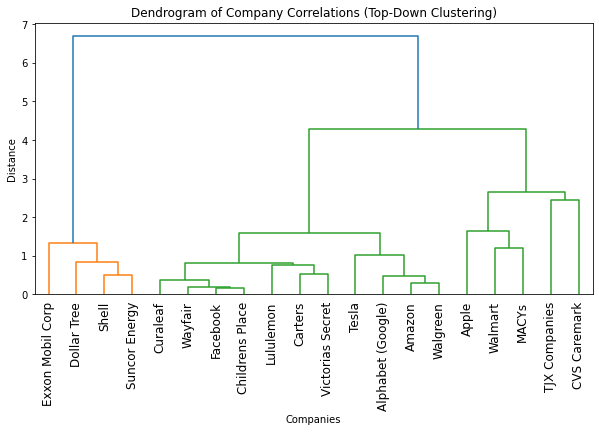

In [10]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Convert correlation matrix to distance matrix
dist_mat = 1 - correlation_mat

# Perform top-down clustering
clustering = sch.linkage(dist_mat, method='complete')
cuts = sch.cut_tree(clustering, n_clusters=[3, 4])

# Plot dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(clustering, labels=list(df_combined.columns), leaf_rotation=90)
plt.title('Dendrogram of Company Correlations (Top-Down Clustering)')
plt.xlabel('Companies')
plt.ylabel('Distance')
plt.show()



##How to Decide the Optimum Number of Clusters from the Dendrogram

The easiest way to find the optimum number of clusters is to look at the number of colors used in the resulting dendrogram. The number of optimum clusters is one less than the number of colors. So, according to this dendrogram, the number of optimum clusters is two.
Another method to find the optimum number of clusters is by identifying the point at which the distance between the clusters changes abruptly. This is called the "knee point" or "elbow point" and can be used to determine the number of clusters that best captures the variation in the data. In this data, the highest distance change between different numbers of clusters occurs between 1 and 2 clusters. Thus, again, the optimum number of clusters is two.

##Getting Any Number of Clusters from Dendrogram

One advantage of using a dendrogram is that we can cluster our objects into any number of clusters just by looking at the dendrogram. For example, if we need to find two clusters, we can look at the top-most vertical lines on the dendrogram and decide on the clusters. In our case, if we need two clusters, then there are four companies in the first cluster and 16 companies in the second cluster. If we need three clusters, we can further split the second cluster into 11 and 5 companies.

In this diagram, we can clearly see the relationships among different companies. It is clear that there are three main clusters. All three oil and gas companies we had have been clustered together. The discount retailer Dollar Tree is also clustered with these companies. Walmart, TJX, CVS, and Macy's are clustered together. This is reasonable, as all these companies are in the retail space. However, Apple is also clustered with these companies

#Bottom-Up (Agglomerative) Clustering

<ipython-input-11-0dad960dee31>:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clustering = sch.linkage(dist_mat, method='ward')


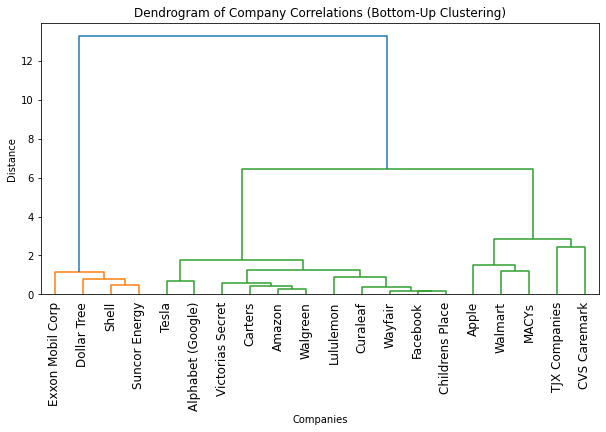

In [11]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Convert correlation matrix to distance matrix
dist_mat = 1 - correlation_mat

# Perform bottom-up clustering
clustering = sch.linkage(dist_mat, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(clustering, labels=list(df_combined.columns), leaf_rotation=90)
plt.title('Dendrogram of Company Correlations (Bottom-Up Clustering)')
plt.xlabel('Companies')
plt.ylabel('Distance')
plt.show()

The dendrogram we obtain for the bottom-up clustering is similar to the top-down clustering. For example, the optimum number of clusters is still two (based on both the number of colors and the knee method). However, we may observe some slight differences if we need a higher number of clusters.

#Conclusion

To sum up, Dendrograms are a useful tool for visualizing complex data structures and identifying subgroups or clusters of data that share similar characteristics. In this post, we used hierarchical clustering methods to demonstrate how to create dendrograms and how to decide on the optimum number of clusters. By analyzing the dendrogram obtained from the correlation data of daily stock prices among companies, we found that there were three main clusters. The dendrogram obtained from bottom-up clustering was similar to the dendrogram obtained from top-down clustering. Dendrograms are helpful in understanding relationships among different companies, but they can also be used in a variety of other fields to understand the hierarchical structure of data.

#References
[1] Pearson, K. (1901). On lines and planes of closest fit to systems of points in space. Philosophical Magazine, 2(11), 559–572. doi: 10.1080/14786440109462720
